In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
request_df = pd.read_csv("//home/biomedmax/github/project-1-ironhack-payments-es/project_dataset/extract - cash request - data analyst.csv")
fees_df = pd.read_csv("//home/biomedmax/github/project-1-ironhack-payments-es/project_dataset/extract - fees - data analyst - .csv")

In [3]:
fees_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [4]:
request_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [5]:
request_df_missing = [request_df['created_at'].isna().any()]
request_df_missing

[False]

In [6]:
request_df["created_at"]

0        2019-12-10 19:05:21.596873+00
1         2019-12-10 19:50:12.34778+00
2         2019-12-10 19:13:35.82546+00
3        2019-12-10 19:16:10.880172+00
4        2020-05-06 09:59:38.877376+00
                     ...              
23965    2020-10-12 13:54:11.686225+00
23966     2020-10-27 14:41:25.73491+00
23967    2020-10-20 07:58:04.006937+00
23968    2020-10-10 05:40:55.700422+00
23969    2020-10-08 14:16:52.155661+00
Name: created_at, Length: 23970, dtype: object

In [7]:
pd.to_datetime(request_df['created_at'])

0       2019-12-10 19:05:21.596873+00:00
1       2019-12-10 19:50:12.347780+00:00
2       2019-12-10 19:13:35.825460+00:00
3       2019-12-10 19:16:10.880172+00:00
4       2020-05-06 09:59:38.877376+00:00
                      ...               
23965   2020-10-12 13:54:11.686225+00:00
23966   2020-10-27 14:41:25.734910+00:00
23967   2020-10-20 07:58:04.006937+00:00
23968   2020-10-10 05:40:55.700422+00:00
23969   2020-10-08 14:16:52.155661+00:00
Name: created_at, Length: 23970, dtype: datetime64[ns, UTC]

In [8]:
#Crear una copia de mi DF de pagos y transformar la columna created_at a fechas
request_df_2 = request_df.copy()

request_df_2['created_at'] = pd.to_datetime(request_df_2['created_at'])
request_df_2['updated_at'] = pd.to_datetime(request_df_2['updated_at'])
request_df_2['moderated_at'] = pd.to_datetime(request_df_2['moderated_at'], errors="coerce")
request_df_2['reimbursement_date'] = pd.to_datetime(request_df_2['reimbursement_date'], errors="coerce")
request_df_2['cash_request_received_date'] = pd.to_datetime(request_df_2['cash_request_received_date'], errors="coerce")
request_df_2['money_back_date'] = pd.to_datetime(request_df_2['money_back_date'], errors="coerce")
request_df_2['send_at'] = pd.to_datetime(request_df_2['send_at'], errors="coerce")
request_df_2['send_at'] = pd.to_datetime(request_df_2['send_at'], errors="coerce")
request_df_2['reco_creation'] = pd.to_datetime(request_df_2['reco_creation'], errors="coerce")
request_df_2['reco_last_update'] = pd.to_datetime(request_df_2['reco_last_update'], errors="coerce")

request_df_2['user_id'] = request_df_2['user_id'].fillna(request_df_2["deleted_account_id"])

request_df_2['user_id'] = request_df_2["user_id"].astype("int")

In [9]:
request_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  datetime64[ns, UTC]
 5   user_id                     23970 non-null  int64              
 6   moderated_at                15912 non-null  datetime64[ns, UTC]
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          3050 non-null   datetime64[ns, UTC]
 9   cash_request_received_date  16289 non-null  datetime64[ns]     
 10  money_back_date             12040 non-null  datetime64[ns,

In [10]:
#Sortear segun fecha de creacion del primer prestamo
print(len(request_df_2["user_id"].unique()))
request_df_2.drop_duplicates(subset=["user_id"])
print(len(request_df_2["user_id"].unique()))

request_df_2 = request_df_2.sort_values(["created_at"])


11793
11793


In [11]:
#Ver agrupacion de usuarios por el mes de su primer adelanto
request_df_2['created_at'].dt.month

#Creo una nueva columna con el mes del adelanto
request_df_2['month_cohort'] = request_df_2['created_at'].dt.month

request_df_2.groupby("month_cohort").count()



#request_df_2.groupby("month_cohort").sum(["amount"])


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
month_cohort,,,,,,,,,,,,,,,,
1,223,223,223,223,223,223,219,47,112,111,71,223,0,33,33,33
2,184,184,184,184,184,184,183,27,59,111,72,184,0,16,16,16
3,244,244,244,244,244,244,237,37,46,169,165,244,0,18,18,18
4,473,473,473,473,473,473,467,55,93,323,320,473,0,59,59,59
5,837,837,837,837,837,837,819,110,152,604,572,837,0,129,129,129
6,2615,2615,2615,2615,2615,2615,2589,364,300,1647,977,2615,0,329,329,329
7,3601,3601,3601,3601,3601,3601,3581,442,319,2009,483,3601,1130,402,402,402
8,3417,3417,3417,3417,3417,3417,2975,327,491,2010,1246,3417,3327,438,438,438
9,4221,4221,4221,4221,4221,4221,3356,419,585,2660,2170,4221,4174,579,579,579


In [12]:
#retention = df.pivot(index="cohort", columns="Fecha compra" , values="Num Clients").divide(cohort_sIze_innitial["num clientes"]) ... .divide

Quiero convertir cash_request_id a int; created_at, updated_at, paid_at, from_date,to_date y charge_moment a date y type, status, category y reason a str

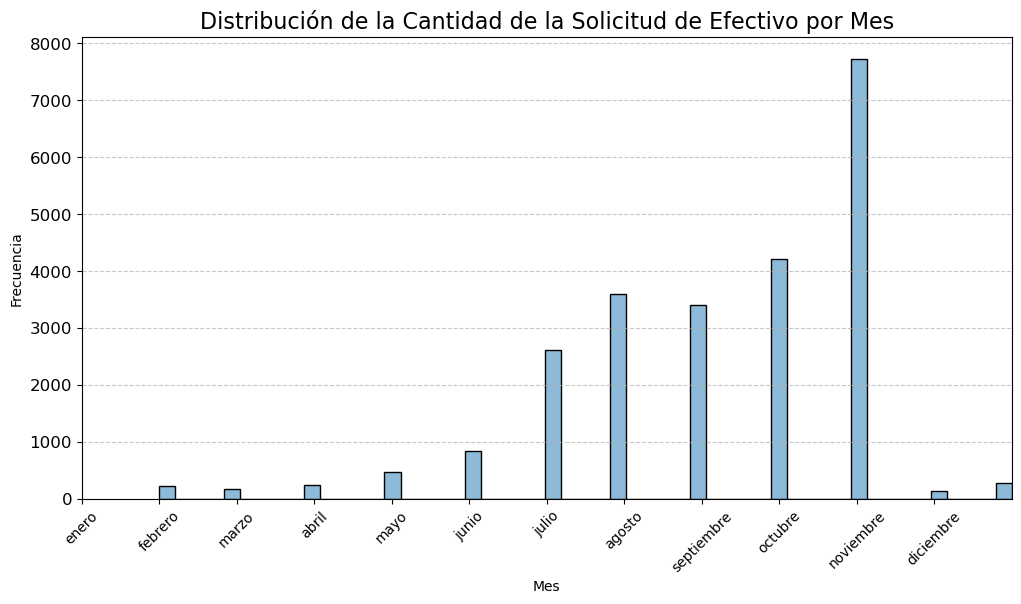

<Figure size 800x400 with 0 Axes>

In [13]:
# Histogramas

meses_espanol = [

    "enero",

    "febrero",

    "marzo",

    "abril",

    "mayo",

    "junio",

    "julio",

    "agosto",

    "septiembre",

    "octubre",

    "noviembre",

    "diciembre"

]

plt.figure(figsize=(12, 6))

sns.histplot(request_df_2['month_cohort'], alpha=0.5)

plt.title('Distribución de la Cantidad de la Solicitud de Efectivo por Mes', fontsize=16)

plt.xlabel('Mes')

plt.ylabel('Frecuencia')

plt.yticks(fontsize=12)

plt.xticks(ticks=range(12), labels=meses_espanol, rotation=45)

plt.xlim(0, 12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.figure(figsize=(8,4), tight_layout=True)


plt.show()

'\nfor idx, row in transfer_counts.iterrows():\n    # Plot a pie chart for each row\n    plt.pie(row,  startangle=140)\n    plt.show()\n\n    '

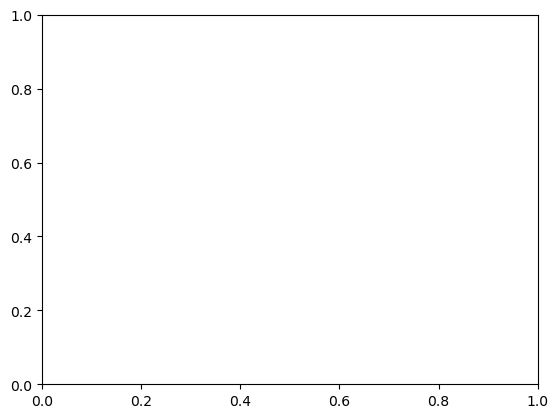

In [14]:
fig, ax = plt.subplots()

request_df_2.groupby("month_cohort")["transfer_type"].count()
#request_df_2.groupby("transfer_type").count()
transfer_counts = request_df_2.groupby(["month_cohort", "transfer_type"]).size().unstack(fill_value=0)
#ax.pie(request_df_2.groupby("transfer_type").count())
transfer_counts
#plt.figure(figsize=(8, 8))
"""
for idx, row in transfer_counts.iterrows():
    # Plot a pie chart for each row
    plt.pie(row,  startangle=140)
    plt.show()

    """

In [21]:
transfer_counts

transfer_type,instant,regular
month_cohort,,
1,0,223
2,0,184
3,0,244
4,0,473
5,0,837
6,0,2615
7,344,3257
8,2506,911
9,3695,526


TypeError: Axes.bar() missing 1 required positional argument: 'height'

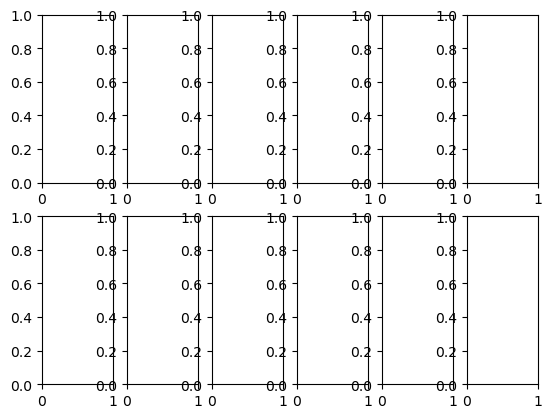

In [24]:
# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=6)

# Iterate over each row in transfer_counts DataFrame
for i, (idx, row) in enumerate(transfer_counts.iterrows()):

    if i<=5:
        # Plot a pie chart as a subplot for each row
        axs[0,i].pie(row)

        # Equal aspect ratio ensures that pie is drawn as a circle.
        axs[0,i].axis('equal') 

        # Add a title with the month_cohort value
        axs[0,i].set_title(f"Transfers for {meses_espanol[idx-1]}", size=10, rotation = 45, loc="center", pad=10)

    else:
        j=i-6
        axs[1,j].pie(row)

        axs[1,j].axis('equal') 
             
        axs[1,j].set_title(f"Transfers for {meses_espanol[idx-1]}", size=10, rotation = 45)


    

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.legend(["instant", "regular"], bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the pie chart
plt.show()

In [16]:


subset_missing_values = pd.isna(fees_df['cash_request_id'])
subset_missing_values

# Assuming fees_df is your DataFrame
subset_missing_values = fees_df[fees_df['cash_request_id'].isna()]

# Display the subset
print(subset_missing_values)

         id  cash_request_id             type     status category  \
1911   2990              NaN  instant_payment  cancelled      NaN   
1960   3124              NaN  instant_payment  cancelled      NaN   
4605   5185              NaN  instant_payment  cancelled      NaN   
11870  3590              NaN  instant_payment  cancelled      NaN   

       total_amount                              reason  \
1911            5.0  Instant Payment Cash Request 11164   
1960            5.0  Instant Payment Cash Request 11444   
4605            5.0  Instant Payment Cash Request 11788   
11870           5.0  Instant Payment Cash Request 12212   

                          created_at                     updated_at paid_at  \
1911   2020-08-06 22:42:34.525373+00  2020-11-04 16:01:17.296048+00     NaN   
1960   2020-08-08 06:33:06.244651+00  2020-11-04 16:01:08.332978+00     NaN   
4605   2020-08-26 09:39:37.362933+00  2020-11-04 16:01:36.492576+00     NaN   
11870  2020-08-12 14:20:06.657075+00  2020

In [17]:
fees_df_2= fees_df.dropna(subset=['cash_request_id'])
fees_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21057 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21057 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21057 non-null  object 
 3   status           21057 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21057 non-null  float64
 6   reason           21057 non-null  object 
 7   created_at       21057 non-null  object 
 8   updated_at       21057 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21057 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.2+ MB


In [18]:
fees_df_2["cash_request_id"] = fees_df_2['cash_request_id'].astype(int)
#fees_df["created_at"] = pd.to_datetime(fees_df["created_at"])
#fees_df["created_at"] = pd.to_datetime(fees_df["created_at"])
fees_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21057 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21057 non-null  int64  
 1   cash_request_id  21057 non-null  int64  
 2   type             21057 non-null  object 
 3   status           21057 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21057 non-null  float64
 6   reason           21057 non-null  object 
 7   created_at       21057 non-null  object 
 8   updated_at       21057 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21057 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 2.2+ MB


/tmp/ipykernel_38254/1261044098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fees_df_2["cash_request_id"] = fees_df_2['cash_request_id'].astype(int)


In [19]:
# Ver que cuantos valores diferentes hay en cada columna
columnas_fees = fees_df_2.columns.tolist()
for i in columnas_fees:
    print(f"{fees_df_2[i].value_counts().head(10)}")

id
13301    1
13095    1
4325     1
3107     1
6467     1
6461     1
11489    1
9976     1
4752     1
832      1
Name: count, dtype: int64
cash_request_id
12225    35
5006     28
4410     24
12452    23
11376    21
2358     19
11746    17
15319    16
8713     15
11968    15
Name: count, dtype: int64
type
instant_payment    11095
postpone            7766
incident            2196
Name: count, dtype: int64
status
accepted     14841
cancelled     4934
rejected      1194
confirmed       88
Name: count, dtype: int64
category
rejected_direct_debit     1599
month_delay_on_payment     597
Name: count, dtype: int64
total_amount
5.0     21056
10.0        1
Name: count, dtype: int64
reason
rejected direct debit               1599
month delay on payment - 9/2020      283
month delay on payment - 8/2020      203
month delay on payment - 10/2020     102
Postpone Cash Request 12225           34
Postpone Cash Request 5006            25
Postpone Cash Request 4410            23
Postpone Cash Request 1137

ValueError: could not convert string to float: 'instant_payment'

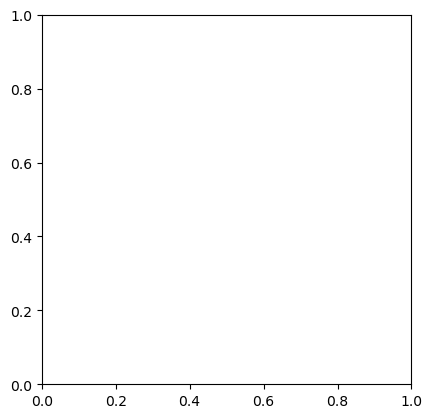

In [20]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(fees_df_2["type"], labels = ["ada","qead","qe"], colors = colors, autopct='%.0f%%')
plt.show()